# Ad-hoc analysis / inspect output of simple_mm


In [33]:
import requests, json
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'
import asyncio
import os
import json
import copy
import matplotlib.pyplot as plt

from simple_mm import *

MARKET_INDEX_SOL = 0
userAccount       = "ECbtn9Y34m6L89EBDMRYxhpyrFgSHEcbELgozpqAvcDY"
PKEY              = "7f6d3DWGkNrKTERtW9McbBQCVbZibuHUf7CsdUjJyK1t"
URL_ORDERS_SELF   = f"https://master.api.drift.trade/orders/userAccounts?userPublicKeys={PKEY}&pageIndex=0&pageSize=100&marketType=perp"
URL_HISTORY_SELF  = f"https://beta.drift.trade/overview/history/tradeHistory?userAccount={PKEY}"
URL_DEVNET_OB     = "https://master.dlob.drift.trade/orders/json"

In [34]:
df = pd.read_pickle("history.h5").T
df["mm_bid"] = df["mm_bid_offsets"].apply(lambda x : x[0]) # Take most competitive bid
df["mm_ask"] = df["mm_ask_offsets"].apply(lambda x : x[0])


df[["oraclePrice", "ob_mid", "ob_bid", "ob_ask", "mm_bid", "mm_ask", "time"]]


,oraclePrice,ob_mid,ob_bid,ob_ask,mm_bid,mm_ask,time
1,23.67839,3.158265,-0.00508,6.32161,0.000833,0.001683,2023-04-30 12:27:38.057956
2,23.638467,3.193128,0.024723,6.361533,0.000833,0.001683,2023-04-30 12:27:54.564609
3,23.627519,3.179203,-0.014074,6.372481,0.000833,0.001683,2023-04-30 12:28:10.352614
4,23.631542,3.186136,0.003813,6.368458,0.000833,0.001683,2023-04-30 12:28:28.363751
5,23.618015,3.192242,0.0025,6.381985,0.000833,0.001683,2023-04-30 12:28:45.288858
6,23.602384,3.196485,-0.004647,6.397616,0.000833,0.001683,2023-04-30 12:29:07.781336
7,23.610335,3.196083,0.0025,6.389665,0.000833,0.001683,2023-04-30 12:29:28.485975
8,23.623787,3.191284,0.006355,6.376213,0.000833,0.001683,2023-04-30 12:29:49.914573


<Axes: title={'center': 'Orderbook bid vs Market Maker Bid (relative to oracle)'}>

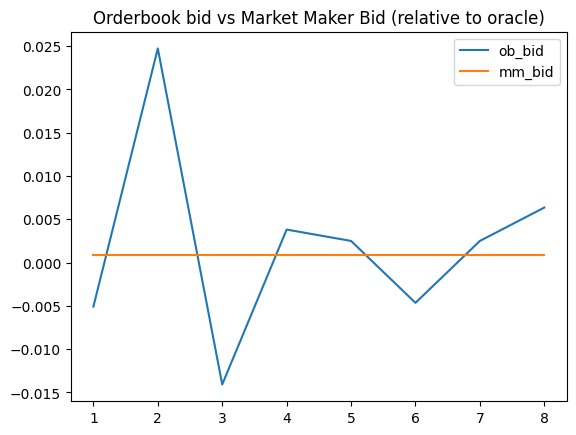

In [35]:
df[["ob_bid","mm_bid"]].plot(title="Orderbook bid vs Market Maker Bid (relative to oracle)")

<Axes: title={'center': 'Orderbook Ask vs Market Maker Ask (relative to Oracle)'}>

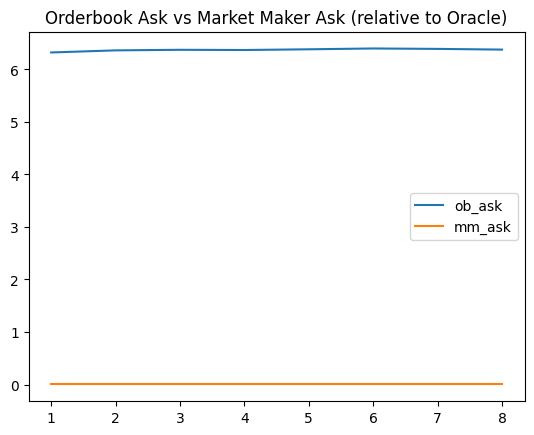

In [36]:
df[["ob_ask","mm_ask"]].plot(title="Orderbook Ask vs Market Maker Ask (relative to Oracle)")